In [1]:
import pandas as pd

data = pd.read_hdf('./data/full_data.hd5')

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


cols = ['cleanedJet_eta', 'cleanedJet_phi', 'cleanedJet_pt', 'cleanedJet_btagDeepB']
jet_data = data.loc[:, cols]
jet_data_arr = np.zeros((len(jet_data), 14, 4))
scaler = StandardScaler()
for i in range(14):
        for j, k in enumerate(cols):
            jet_data_arr[:, i, j] = jet_data.loc[:, k].map(lambda x: x[i] if len(x) > i else 0)
jet_data_arr


array([[[-5.13671875e-01,  1.56250000e+00,  1.19414330e+02,
          9.78027344e-01],
        [-1.28125000e+00, -8.07617188e-01,  9.70109711e+01,
          3.34228516e-01],
        [ 2.68798828e-01, -9.53369141e-02,  7.57926788e+01,
          2.45819092e-02],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]],

       [[-4.22851562e-01, -2.24023438e+00,  2.24808548e+02,
          1.05361938e-02],
        [ 4.18457031e-01,  8.46679688e-01,  1.24097435e+02,
          2.83813477e-02],
        [ 1.92578125e+00, -1.40234375e+00,  9.66871109e+01,
          3.70117188e-01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.000

In [5]:
labels = data['ttH125'].values

In [6]:
def get_index(val, cat, res=0.08):

    if cat == 'phi':
        val += np.pi
        # val = np.maximum()
        idx = np.minimum(val // res, 77).astype(int)
    if cat == 'eta':
        val += 5
        idx = np.minimum(val // res, 124).astype(int)
    return idx

In [7]:
# Eta-phi plane with resolution of 0.08 (VBF paper)

grid_sg, grid_bg = np.zeros((125, 78)), np.zeros((125, 78))
labels = labels.astype(int)
for i in range(14):
    if i == 0:
        sg_etas, bg_etas = np.ones(np.sum(labels), dtype=int) * 62, np.ones(np.sum(labels), dtype=int) * 62
        sg_phis, bg_phis = np.ones(len(labels) - np.sum(labels), dtype=int) * 39, np.ones(len(labels) - np.sum(labels), dtype=int) * 39
        # sg_etas = get_index(jet_data_arr[:,i,0][(labels==1) & (jet_data_arr[:, i, 2] != 0)], cat='eta')
        # bg_etas = get_index(jet_data_arr[:,i,0][(labels==0) & (jet_data_arr[:, i, 2] != 0)], cat='eta')
        # sg_phis = get_index(jet_data_arr[:,i,1][(labels==1) & (jet_data_arr[:, i, 2] != 0)], cat='phi')
        # bg_phis = get_index(jet_data_arr[:,i,1][(labels==0) & (jet_data_arr[:, i, 2] != 0)], cat='phi')
    else:
        sg_etas = get_index(jet_data_arr[:,i,0][(labels==1) & (jet_data_arr[:, i, 2] != 0)] - jet_data_arr[:,0,0][(labels==1) & (jet_data_arr[:, i, 2] != 0)], cat='eta')
        bg_etas = get_index(jet_data_arr[:,i,0][(labels==0) & (jet_data_arr[:, i, 2] != 0)] - jet_data_arr[:,0,0][(labels==0) & (jet_data_arr[:, i, 2] != 0)], cat='eta')
        sg_phis = get_index(jet_data_arr[:,i,1][(labels==1) & (jet_data_arr[:, i, 2] != 0)] - jet_data_arr[:,0,1][(labels==1) & (jet_data_arr[:, i, 2] != 0)], cat='phi')
        bg_phis = get_index(jet_data_arr[:,i,1][(labels==0) & (jet_data_arr[:, i, 2] != 0)] - jet_data_arr[:,0,1][(labels==0) & (jet_data_arr[:, i, 2] != 0)], cat='phi')
        
    sg_pt = jet_data_arr[:, i, 2][(labels==1) & (jet_data_arr[:, i, 2] != 0)]
    bg_pt = jet_data_arr[:, i, 2][(labels==0) & (jet_data_arr[:, i, 2] != 0)]

    for eta, phi, pt in zip(sg_etas, sg_phis, sg_pt):
        grid_sg[eta, phi] += pt

    for eta, phi, pt in zip(bg_etas, bg_phis, bg_pt):
        grid_bg[eta, phi] += pt

grid_bg /= np.sum(jet_data_arr[labels==0])
grid_sg /= np.sum(jet_data_arr[labels==1])

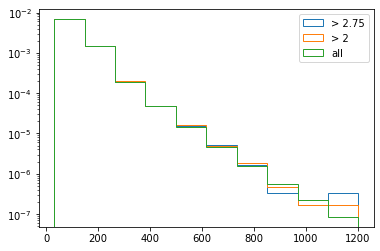

In [23]:
hist, bins, patches = plt.hist(jet_data_arr[:, :, 2].flatten()[jet_data_arr[:, :, 1].flatten() > 2.75], log=True, histtype='step', label='> 2.75', density=True)
plt.hist(jet_data_arr[:, :, 2].flatten()[jet_data_arr[:, :, 1].flatten() > 2], log=True, histtype='step', label='> 2', bins=bins, density=True)
plt.hist(jet_data_arr[:, :, 2].flatten()[jet_data_arr[:, :, 1].flatten() != 0], log=True, label='all', histtype='step', bins=bins, density=True)
plt.legend()
plt.show()

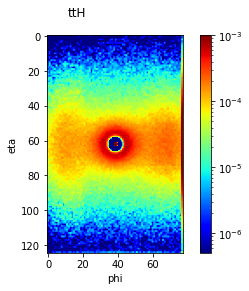

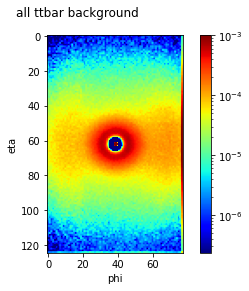

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.cm import get_cmap
import copy

# Copy the jet cmap from matplotlib
my_cmap = copy.copy(get_cmap("jet"))
# Set bad (zero value) pixels to dark blue
my_cmap.set_bad((0, 0, 0.5))

plt.imshow(grid_sg, cmap=my_cmap, norm=LogNorm(vmax=1e-3))
plt.xlabel('phi')
plt.ylabel('eta')
plt.colorbar()
plt.suptitle("ttH")
plt.show()

plt.imshow(grid_bg, cmap=my_cmap, norm=LogNorm(vmax=1e-3))
plt.xlabel('phi')
plt.ylabel('eta')
plt.colorbar()
plt.suptitle("all ttbar background")
plt.show()

In [3]:
import numpy as np

def get_index(val, cat, res=0.08):
    if cat == 'phi':
        val += np.pi
        # val = np.maximum()
        idx = np.minimum(val // res, 77).astype(int)
    if cat == 'eta':
        val += 5
        idx = np.minimum(val // res, 124).astype(int)
    return idx

jet_image = np.zeros((len(jet_data_arr), 78, 125, 2), dtype=np.half)
jet_image[:,:,:,:] = np.nan
label = labels.astype(int)
for idx, event in enumerate(jet_data_arr):
    for i in range(14):
        if i == 0:
            eta, phi = 63 * np.ones(len(jet_data_arr)), 39 * np.ones(len(jet_data_arr))
        else:
            eta = get_index(event[i,0], 'eta')
            phi = get_index(event[i, 1], 'phi')
        jet_image[idx, phi, eta, 0] = event[i,2] # pt
        jet_image[idx, phi, eta, 1] = event[i,3] # btag discriminator
        


NameError: name 'jet_data_arr' is not defined

In [14]:
jet_image[:,:,:,:][jet_image[:,:,:,:] == 0] = np.nan
np.min(jet_image)

KeyboardInterrupt: 

In [15]:
np.min(jet_image)

KeyboardInterrupt: 

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(jet_image, labels, stratify=labels, random_state=42, test_size=0.2)

In [17]:
X_train.shape

(327177, 78, 125, 2)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten
from tensorflow.keras.models import Sequential, Model

inp = Input(shape=list(X_train.shape[1:]))
conv1 = Conv2D(filters=100, kernel_size=(5,5), activation='relu', padding="SAME")(inp)
mp1 = MaxPooling2D(pool_size=(4,4))(conv1)
conv2 = Conv2D(filters=100, kernel_size=(5,5), strides=4, activation='relu', padding="SAME")(mp1)
mp2 = MaxPooling2D(pool_size=2)(conv1)
flat = Flatten()(mp2)
dense1 = Dense(200, activation="selu", kernel_initializer="lecun_normal")(flat)
dense2 = Dense(200, activation="selu", kernel_initializer="lecun_normal")(dense1)
out = Dense(1, activation="sigmoid")(flat)
model = Model(inputs=inp, outputs=out)
model.compile(loss="binary_crossentropy", optimizer="Nadam")

2022-02-28 09:56:01.649093: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-02-28 09:56:05.239543: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-02-28 09:56:05.241705: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-02-28 09:56:06.128586: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.56GiB deviceMemoryBandwidth: 298.08GiB/s
2022-02-28 09:56:06.131165: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:5e:00.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.56GiB deviceMemoryBandwidth: 298.08GiB/s
2022-02-28 09:56:06.133696: I

In [19]:
from sklearn.preprocessing import StandardScaler

for i in range(2):
    scaler = StandardScaler()
    train, test = X_train[:,:,:,i].reshape(X_train.shape[0], -1), X_test[:,:,:,i].reshape(X_test.shape[0], -1)
    print("done")
    X_train[:,:,:,i] = scaler.fit_transform(train).reshape(X_train.shape[:-1])
    print("done")
    X_test[:,:,:,i] = scaler.transform(test).reshape(X_test.shape[:-1])



done


/software/ac18804/miniconda3/envs/gpu_env/lib/python3.7/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/software/ac18804/miniconda3/envs/gpu_env/lib/python3.7/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count


KeyboardInterrupt: 

In [20]:
X_train[:,:,:,0].reshape(X_train.shape[0], -1).shape

(327177, 9750)

In [91]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

In [94]:
class_weights = {i:j for i,j in enumerate(class_weights)}

In [95]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64, class_weight=class_weights)

Epoch 1/3
5113/5113 [==============================] - 12s 2ms/step - loss: 0.6791 - val_loss: 0.6771
Epoch 2/3
5113/5113 [==============================] - 10s 2ms/step - loss: 0.6786 - val_loss: 0.6875
Epoch 3/3
5113/5113 [==============================] - 11s 2ms/step - loss: 0.6784 - val_loss: 0.6747


In [96]:
preds = model.predict(X_test)
preds.reshape(preds.shape[0])

array([0.41952497, 0.5403764 , 0.41952497, ..., 0.47297165, 0.41952497,
       0.4865431 ], dtype=float32)

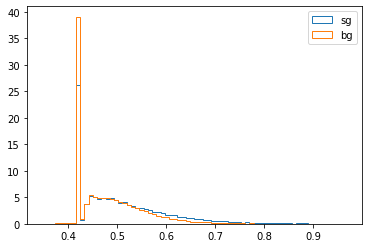

In [97]:
hist, bins, patches = plt.hist(preds[y_test==1], label='sg', histtype='step', bins='auto', density=True)
plt.hist(preds[y_test==0], label='bg', histtype='step', bins=bins, density=True)
plt.legend()
plt.show()
